In [57]:
import numpy as np

def bezier(points, precision):
    ts = np.linspace(0, 1, precision)
    B = np.zeros((len(ts), 2), dtype=np.float64)
    n = len(points) - 1
    for idx, t in enumerate(ts):
        for i in range(n+1):
            bin_coef = np.math.factorial(n) / (np.math.factorial(i) * np.math.factorial(n-i))
            Pin = bin_coef * (1-t)**(n-i) * t**i
            B[idx] += Pin * points[i]

    return B

padding = 20

def criando_pontos(tam):
    points = []
    vetor_distancias = []
    while len(points)<tam:
        p1x = np.random.randint(0,1776-padding)   
        p1y = np.random.randint(0,1504-padding)   
        p2x = np.random.randint(0,1776-padding) 
        p2y = np.random.randint(0,1504-padding)  
        distancia = np.sqrt((p1x-p2x)**2 + (p1y-p2y)**2)
        if distancia > 500 and distancia < 1300:
            p1 = np.array((p1x,p1y))
            p2 = np.array((p2x,p2y))
            p = np.vstack((p1, p2))        
            points.append(p)
            distancia
    return points, distancia

def criar_array_curves(pontos):
    array_curves = []

    ps = pontos[0][0] # ponto inicial   
    pe = pontos[0][1] # ponto final 
    dx = pe[0]-ps[0]
    dy = pe[1]-ps[1]
    distancia = np.sqrt((pe[0]-ps[0])**2 + (pe[1] - ps[1])**2)
    normal_se = np.array((-dy, dx))/distancia #ou (dy, -dx) --> vetor normal à (pe-ps)
    max_vd = 500 # distancia máxima em que os pontos de controle serão sorteados (usar entre 0 e 1)
    n_points = 200 # numero de pontos de controle entre pe e ps 

    control_points = []
    hds = np.linspace(0.2, 0.8, n_points) # faz com que os pontos de controle sejam equidistantes em relação à (pe-ps)

    for j in range(n_points):    
        # control_point = (pe-ps) * np.random.uniform(low=0.2, high=0.8)
        control_point = ((pe-ps) * hds[j]) # setar as distancias horizontais dessa maneira deixa um aspecto mais natural
        control_point += (normal_se * np.random.uniform(low=-1, high=1) * max_vd)
        control_points.append(control_point+ps)

    control_points.insert(0, ps)
    control_points.append(pe)
    curve = bezier(control_points, precision=100)       
    array_curves.append(curve)        
    return array_curves 

In [58]:
from matplotlib import pyplot as plt
import sys

from pathlib import Path

#linux
#sys.path.insert(0, "/home/adriano/projeto_mestrado/modules/")

#windows
sys.path.insert(0, r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")

#root_dir = f"/home/adriano/projeto_mestrado/modules"
root_dir = Path(r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")


from Funcoes_gerais import funcoes


tracados_bezier = f'{root_dir}/Artificial_Lines/tracados_bezier/'

img_especifica = 'Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 3-20X'

array_curves = []
for i in range(5): 
    pontos, distancia = criando_pontos(25)
    curve = criar_array_curves(pontos)
    dict = {
        "curve": curve,
        "distancia": distancia
    }
    curve.append(distancia)   
    funcoes.gravar_dict_arquivo(dict,f'{tracados_bezier}/teste/img_savedata_{i+5}.json')
    array_curves.append(curve)

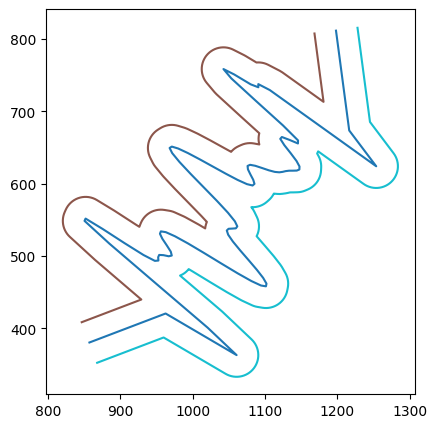

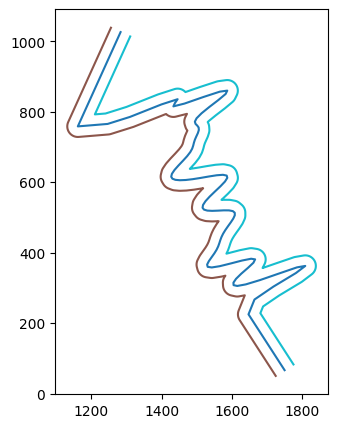

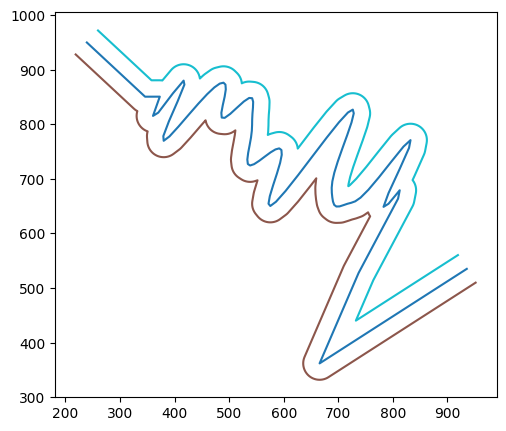

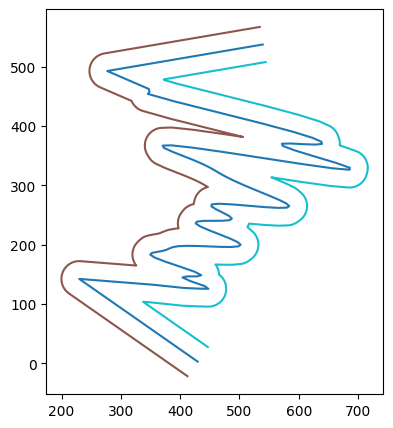

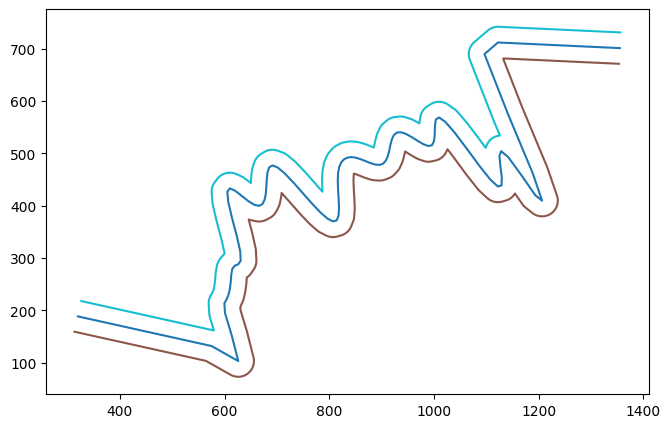

In [59]:
from Background import background_generation as backgen
from geopandas import gpd



for i in range(len(array_curves)):    
    #caminhos_transladados_interpolado = backgen.retorna_caminhos_transladados(array_curves[i], 2) # type: ignore

    linha_central,linha_offset_esquerda,linha_offset_direita, maior_tamanho = backgen.retorna_linhas_offset_posicao_tamanho(array_curves[i][0],30)   
    fig, ax2 = plt.subplots(figsize=(10,5))
    gp4 = gpd.GeoSeries([linha_offset_esquerda, linha_central, linha_offset_direita])   
    gp4.plot(ax=ax2, cmap="tab10")   
    fig.savefig(f'{root_dir}/Artificial_Lines/LineStrings/varios_pontos_controle/tracado_{i}.svg', format='svg')


In [24]:
print(array_curves[0][0])

656.494478270762
